In [7]:
import os
print(os.getcwd())



c:\Users\Hima Bindu\OneDrive\Desktop\finalyearproject


In [12]:
import pandas as pd

df = pd.read_csv("final_nutrition_dataset_10000.csv")
df.head()


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Unnamed: 12,nutrition_risk
0,Scrambled Eggs (2 large),Protein/Dairy,180,12.0,2.0,14.0,0.0,1.0,180.0,370.0,Breakfast,250,NaN,Healthy
1,Whole Wheat Toast (1 slice),Grain,80,4.0,14.0,1.0,2.0,2.0,140.0,0.0,Breakfast,0,NaN,Healthy
2,Coffee (black),Beverage,5,0.3,0.0,0.1,0.0,0.0,5.0,0.0,Breakfast,0,NaN,Healthy
3,Banana,Fruit,105,1.3,27.0,0.4,3.1,14.0,1.0,0.0,Breakfast,0,NaN,Moderate
4,Grilled Chicken Salad,Meal/Protein,350,30.0,10.0,20.0,5.0,4.0,400.0,80.0,Lunch,500,NaN,Healthy


In [13]:
df.shape


(10000, 14)

In [14]:
df.columns


Index(['Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)',
       'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)',
       'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Water_Intake (ml)',
       'Unnamed: 12', 'nutrition_risk'],
      dtype='object')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          10000 non-null  object 
 1   Category           10000 non-null  object 
 2   Calories (kcal)    10000 non-null  int64  
 3   Protein (g)        10000 non-null  float64
 4   Carbohydrates (g)  10000 non-null  float64
 5   Fat (g)            10000 non-null  float64
 6   Fiber (g)          10000 non-null  float64
 7   Sugars (g)         10000 non-null  float64
 8   Sodium (mg)        10000 non-null  float64
 9   Cholesterol (mg)   10000 non-null  float64
 10  Meal_Type          10000 non-null  object 
 11  Water_Intake (ml)  10000 non-null  object 
 12  Unnamed: 12        96 non-null     float64
 13  nutrition_risk     10000 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()


Food_Item               0
Category                0
Calories (kcal)         0
Protein (g)             0
Carbohydrates (g)       0
Fat (g)                 0
Fiber (g)               0
Sugars (g)              0
Sodium (mg)             0
Cholesterol (mg)        0
Meal_Type               0
Water_Intake (ml)       0
Unnamed: 12          9904
nutrition_risk          0
dtype: int64

In [17]:
numeric_cols = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)',
    'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)',
    'Cholesterol (mg)'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:
df[numeric_cols] = df[numeric_cols].fillna(
    df[numeric_cols].median()
)


In [19]:
df = df.drop(
    columns=['Food_Item', 'Category', 'Meal_Type', 'Unnamed: 12'],
    errors='ignore'
)


In [20]:
risk_mapping = {
    'Healthy': 0,
    'Moderate': 1,
    'Unhealthy': 2
}

df['nutrition_risk'] = df['nutrition_risk'].map(risk_mapping)


In [21]:
X = df.drop('nutrition_risk', axis=1)
y = df['nutrition_risk']


In [22]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Calories (kcal)    10000 non-null  int64  
 1   Protein (g)        10000 non-null  float64
 2   Carbohydrates (g)  10000 non-null  float64
 3   Fat (g)            10000 non-null  float64
 4   Fiber (g)          10000 non-null  float64
 5   Sugars (g)         10000 non-null  float64
 6   Sodium (mg)        10000 non-null  float64
 7   Cholesterol (mg)   10000 non-null  float64
 8   Water_Intake (ml)  10000 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 703.3+ KB


In [23]:
y.value_counts()


nutrition_risk
0    6542
1    2995
2     463
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df.describe()


,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),nutrition_risk
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,146.369300,6.645923,15.421060,6.484453,1.681399,5.201640,244.521737,20.211668,0.392100
std,139.242875,11.876907,16.520446,8.158811,2.102160,8.439291,308.145137,43.021431,0.575318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.485011,1.045555,0.191517,0.000000,0.302874,5.143975,0.000000,0.000000
50%,110.000000,2.870122,8.871363,3.000000,0.968477,1.924833,119.793473,0.000000,0.000000
75%,200.000000,7.146580,26.530377,9.940547,2.899440,5.828247,359.658522,24.939457,1.000000
max,680.000000,209.240294,73.187593,41.969257,14.621514,61.469069,1650.136180,466.181073,2.000000


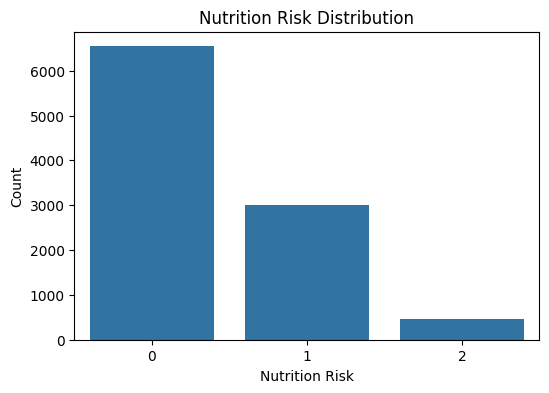

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='nutrition_risk', data=df)
plt.title("Nutrition Risk Distribution")
plt.xlabel("Nutrition Risk")
plt.ylabel("Count")
plt.show()


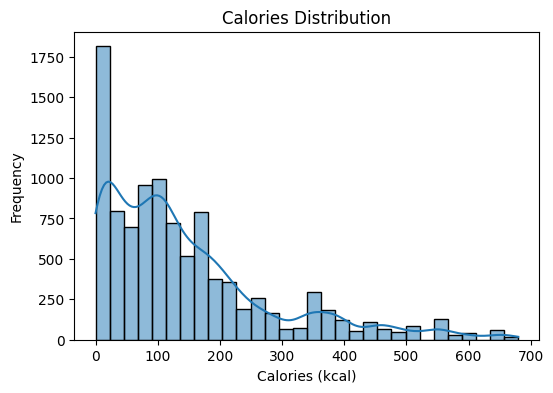

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df['Calories (kcal)'], bins=30, kde=True)
plt.title("Calories Distribution")
plt.xlabel("Calories (kcal)")
plt.ylabel("Frequency")
plt.show()


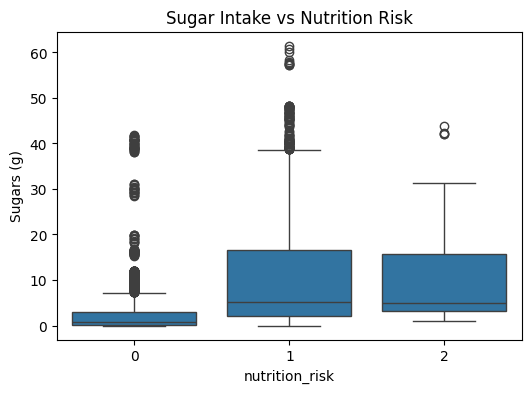

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='nutrition_risk', y='Sugars (g)', data=df)
plt.title("Sugar Intake vs Nutrition Risk")
plt.show()


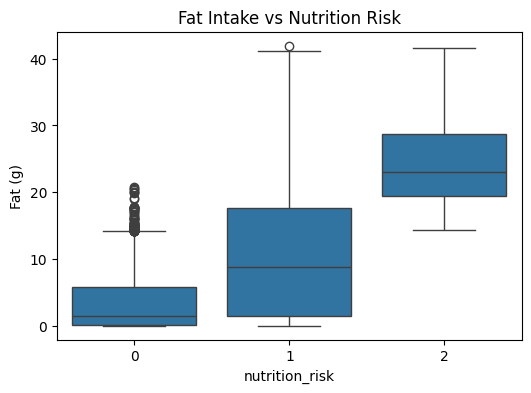

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='nutrition_risk', y='Fat (g)', data=df)
plt.title("Fat Intake vs Nutrition Risk")
plt.show()


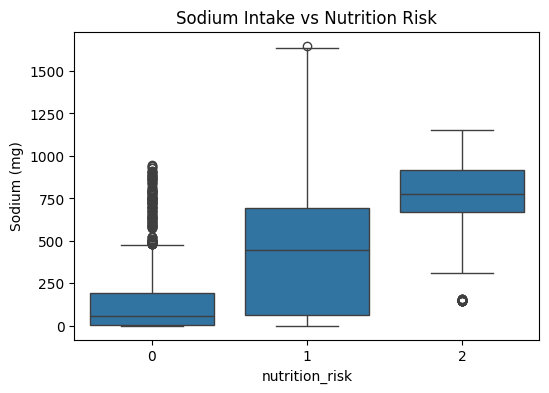

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x='nutrition_risk', y='Sodium (mg)', data=df)
plt.title("Sodium Intake vs Nutrition Risk")
plt.show()


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')


In [33]:
corr = numeric_df.corr()


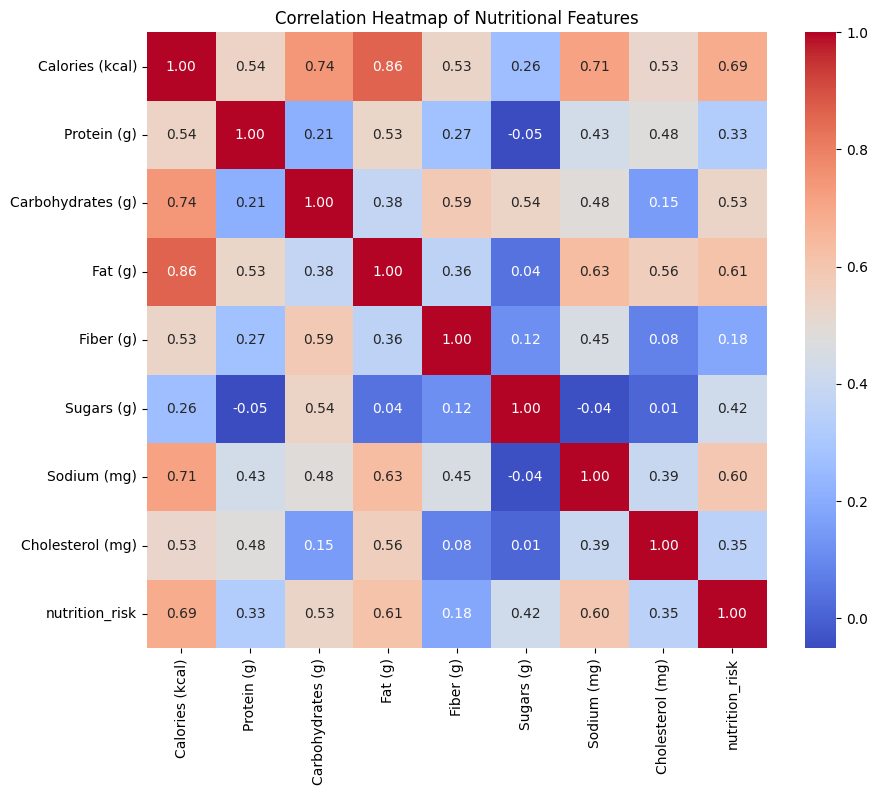

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Features")
plt.show()


In [36]:
#feature selection
# Target column
y = df['nutrition_risk']

# Feature columns (drop target)
X = df.drop('nutrition_risk', axis=1)


In [37]:
# Select numeric columns only
X = X.select_dtypes(include='number')


In [38]:
# Combine features and target
corr_data = X.copy()
corr_data['nutrition_risk'] = y

# Correlation with target
corr_with_target = corr_data.corr()['nutrition_risk'].sort_values(ascending=False)
print(corr_with_target)


nutrition_risk       1.000000
Calories (kcal)      0.685571
Fat (g)              0.612462
Sodium (mg)          0.596513
Carbohydrates (g)    0.532019
Sugars (g)           0.424651
Cholesterol (mg)     0.352463
Protein (g)          0.326189
Fiber (g)            0.184670
Name: nutrition_risk, dtype: float64


In [39]:
selected_features = [
    'Calories (kcal)',
    'Fat (g)',
    'Sugars (g)',
    'Protein (g)',
    'Carbohydrates (g)',
    'Fiber (g)',
    'Sodium (mg)'
]

X = X[selected_features]


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
print(X.shape)
print(X.head())


(10000, 7)
   Calories (kcal)  Fat (g)  Sugars (g)  Protein (g)  Carbohydrates (g)  \
0              180     14.0         1.0         12.0                2.0   
1               80      1.0         2.0          4.0               14.0   
2                5      0.1         0.0          0.3                0.0   
3              105      0.4        14.0          1.3               27.0   
4              350     20.0         4.0         30.0               10.0   

   Fiber (g)  Sodium (mg)  
0        0.0        180.0  
1        2.0        140.0  
2        0.0          5.0  
3        3.1          1.0  
4        5.0        400.0  


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


NameError: name 'X' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("final_nutrition_dataset_10000.csv")

# Encode target
risk_mapping = {
    "Healthy": 0,
    "Moderate": 1,
    "Unhealthy": 2
}
df["nutrition_risk"] = df["nutrition_risk"].map(risk_mapping)

# Create X and y (THIS IS WHAT WAS MISSING AT RUNTIME)
y = df["nutrition_risk"]
X = df.drop("nutrition_risk", axis=1)
X = X.select_dtypes(include="number")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train and test split successful!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Train and test split successful!
X_train shape: (7000, 9)
X_test shape: (3000, 9)


In [6]:
X_train.isnull().sum()


Calories (kcal)         0
Protein (g)             0
Carbohydrates (g)       0
Fat (g)                 0
Fiber (g)               0
Sugars (g)              0
Sodium (mg)             0
Cholesterol (mg)        0
Unnamed: 12          6935
dtype: int64

In [7]:
# Fill missing values in training and testing data
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.877


C:\Users\Hima Bindu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.999


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9986666666666667


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -------- Logistic Regression --------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# -------- Decision Tree --------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# -------- Random Forest --------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# -------- Accuracy Comparison --------
print("MODEL ACCURACY COMPARISON")
print("--------------------------")
print("Logistic Regression Accuracy :", lr_accuracy)
print("Decision Tree Accuracy       :", dt_accuracy)
print("Random Forest Accuracy       :", rf_accuracy)


C:\Users\Hima Bindu\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL ACCURACY COMPARISON
--------------------------
Logistic Regression Accuracy : 0.877
Decision Tree Accuracy       : 0.999
Random Forest Accuracy       : 0.9986666666666667


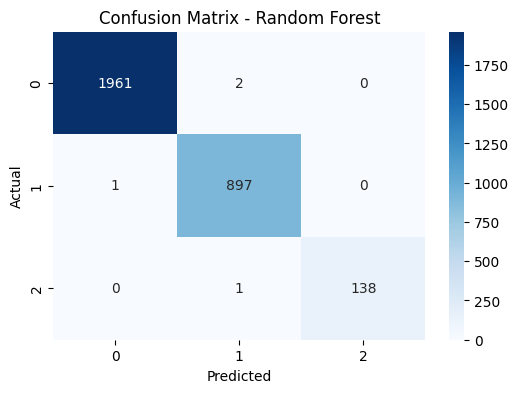

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [14]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1963
           1       1.00      1.00      1.00       898
           2       1.00      0.99      1.00       139

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



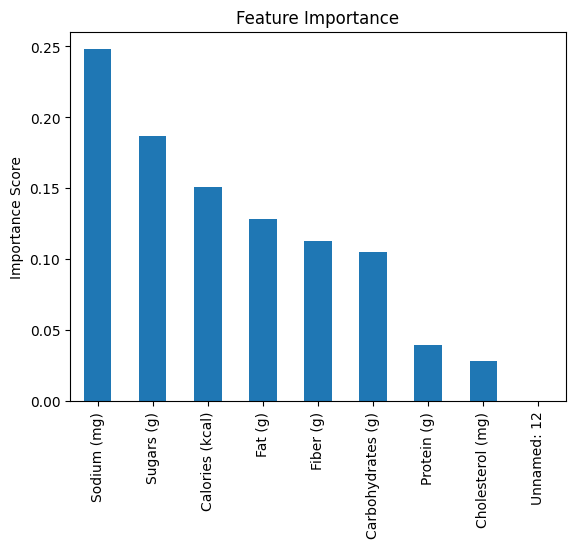

In [15]:
#feature importance
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', title="Feature Importance")
plt.ylabel("Importance Score")
plt.show()


In [16]:
#save the final model
import joblib

joblib.dump(rf_model, "nutrition_risk_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [21]:
model.feature_names_in_


array(['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
       'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)',
       'Unnamed: 12'], dtype=object)

In [23]:
import pandas as pd
import joblib

# Load model
model = joblib.load("nutrition_risk_model.pkl")

# Create input with ALL required columns
sample_input = pd.DataFrame([{
    "Calories (kcal)": 450,
    "Protein (g)": 12,
    "Carbohydrates (g)": 55,
    "Fat (g)": 20,
    "Fiber (g)": 3,
    "Sugars (g)": 30,
    "Sodium (mg)": 600,
    "Cholesterol (mg)": 80,
    "Unnamed: 12": 0
}])

# 🔥 Ensure correct column order
sample_input = sample_input[model.feature_names_in_]

# Predict
prediction = model.predict(sample_input)[0]

risk_map = {0: "Healthy", 1: "Moderate", 2: "Unhealthy"}
print("Predicted Nutrition Risk:", risk_map[prediction])

# Risk score
risk_score = round(max(model.predict_proba(sample_input)[0]) * 100, 2)
print("Risk Score:", risk_score, "%")


Predicted Nutrition Risk: Unhealthy
Risk Score: 86.0 %


In [25]:
from features import *


In [2]:
import pandas as pd

sample_input = pd.DataFrame([{
    "Calories (kcal)": 450,
    "Protein (g)": 12,
    "Carbohydrates (g)": 55,
    "Fat (g)": 20,
    "Fiber (g)": 3,
    "Sugars (g)": 30,
    "Sodium (mg)": 600,
    "Cholesterol (mg)": 80,
    "Unnamed: 12": 0
}])

sample_input = sample_input[model.feature_names_in_]

risk, score = predict_risk(sample_input)
issues = nutrient_issues(sample_input.iloc[0])
suggestions = diet_suggestions(risk)
what_if = what_if_analysis(sample_input)
bmi = calculate_bmi(165, 68)
final_risk = bmi_adjusted_risk(bmi, risk)
condition_diet = condition_based_diet("Diabetes")

print("Risk:", risk)
print("Risk Score:", score)
print("Issues:", issues)
print("Suggestions:", suggestions)
print("What-if:", what_if)
print("BMI:", bmi)
print("Final Risk:", final_risk)
print("Condition Diet:", condition_diet)


NameError: name 'model' is not defined

In [1]:
import os
import sys

print("Current folder:", os.getcwd())
print("Files here:", os.listdir())

# Force current folder into Python path
sys.path.append(os.getcwd())

from features import *


Current folder: c:\Users\Hima Bindu\OneDrive\Desktop\finalyearproject
Files here: ['features.py', 'final_nutrition_dataset_10000.csv', 'nutrition_risk_model.pkl', 'project.ipynb', '__pycache__']


In [2]:
import importlib
import features

importlib.reload(features)

from features import *


In [3]:
print(predict_risk)


<function predict_risk at 0x000001F758D9CFE0>


In [4]:
import pandas as pd

sample_input = pd.DataFrame([{
    "Calories (kcal)": 450,
    "Protein (g)": 12,
    "Carbohydrates (g)": 55,
    "Fat (g)": 20,
    "Fiber (g)": 3,
    "Sugars (g)": 30,
    "Sodium (mg)": 600,
    "Cholesterol (mg)": 80,
    "Unnamed: 12": 0
}])

risk, score = predict_risk(sample_input)
issues = nutrient_issues(sample_input.iloc[0])
suggestions = diet_suggestions(risk)
what_if = what_if_analysis(sample_input)
bmi = calculate_bmi(165, 68)
final_risk = bmi_adjusted_risk(bmi, risk)
condition_diet = condition_based_diet("Diabetes")

print("Risk:", risk)
print("Risk Score:", score)
print("Issues:", issues)
print("Suggestions:", suggestions)
print("What-if:", what_if)
print("BMI:", bmi)
print("Final Risk:", final_risk)
print("Condition Diet:", condition_diet)


Risk: Unhealthy
Risk Score: 86.0
Issues: ['High Sugar', 'High Sodium', 'Low Fiber', 'High Calories']
Suggestions: ['Reduce sugar', 'Avoid fried foods', 'Increase fiber intake']
What-if: Unhealthy
BMI: 24.98
Final Risk: Unhealthy
Condition Diet: ['Low sugar diet', 'High fiber foods']
